In [212]:
import pandas as pd
import numpy as np
import seaborn as sns

In [213]:
#Loading data from link as a dataframe
data = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataClustering.csv')

In [214]:
data 

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825
...,...,...,...,...
346,0.203877,0.195724,2.766999,1.826532
347,0.229380,0.131514,0.704255,2.762919
348,0.095878,0.107426,0.946789,3.434620
349,0.111690,0.130970,1.098922,2.295701


In [215]:
data.info() #Getting details about existence of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      351 non-null    float64
 1   x2      351 non-null    float64
 2   x3      351 non-null    float64
 3   x4      351 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB


In [216]:
data.describe() #characteristics of data

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.278820,0.472738,1.643857,1.482918
std,0.341446,0.511023,1.668052,0.964016
min,0.048604,0.047022,0.367717,0.232562
25%,0.111341,0.115257,0.815180,0.857948
50%,0.153383,0.165684,1.083528,1.190996
75%,0.212564,0.854725,1.557597,1.724461
max,2.037125,2.476118,12.635585,7.726843


In [217]:
data.corr() #Correlation Matrix

,x1,x2,x3,x4
x1,1.000000,0.477973,-0.099997,-0.188592
x2,0.477973,1.000000,-0.220270,-0.293447
x3,-0.099997,-0.220270,1.000000,-0.118288
x4,-0.188592,-0.293447,-0.118288,1.000000


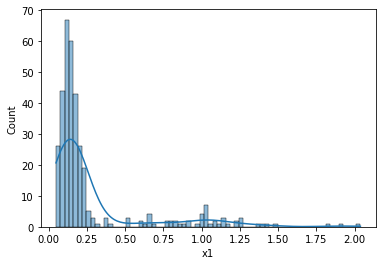

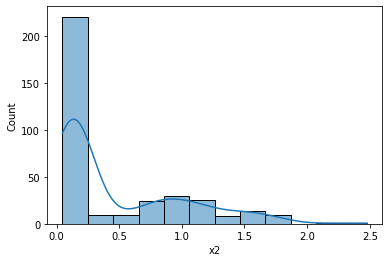

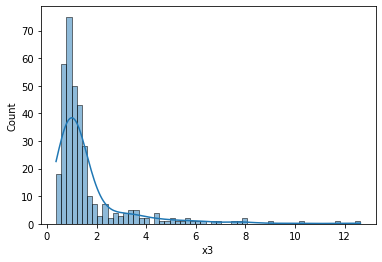

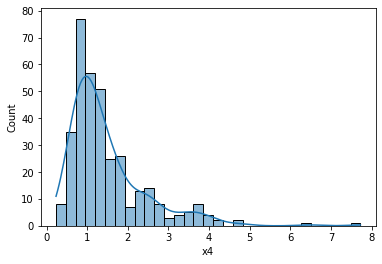

In [218]:
#Plotting histogram for each feature
import matplotlib.pyplot as plt
for column in data.columns.values:
  sns.histplot(data[column],kde=True)
  plt.show()


As we can see, the data is right skewed. So, we would apply log transformation.

In [219]:
# We apply power transformer for data transformation and standardization
from sklearn.preprocessing import PowerTransformer

In [220]:
PT = PowerTransformer() # Here the methof used by default is 'yeo - johnson', and the data will also be standardized by default.
data_transformed = PT.fit_transform(data) #Fitting and transforming the data

In [221]:
data_transformed

array([[ 1.89289283,  1.52485355, -0.34007498, -0.41407712],
       [ 1.98737654,  1.56223077, -0.47399533, -1.03977999],
       [ 1.94153709,  1.36253967,  0.13915026,  0.21840941],
       ...,
       [-0.94716647, -0.87513322, -0.37459819,  1.70555679],
       [-0.70003814, -0.71928565, -0.0638882 ,  1.14947884],
       [-0.66648912,  0.04746441,  0.28985554,  0.40376835]])

In [222]:
data = pd.DataFrame(data_transformed,columns = list(data.columns.values))
#changing the data into dataframe

In [223]:
data #Transformed  and standardized data

,x1,x2,x3,x4
0,1.892893,1.524854,-0.340075,-0.414077
1,1.987377,1.562231,-0.473995,-1.039780
2,1.941537,1.362540,0.139150,0.218409
3,1.950474,1.401740,0.104241,-0.434169
4,1.956236,1.452761,-0.571026,0.664683
...,...,...,...,...
346,0.343397,-0.348687,1.367269,0.770490
347,0.543987,-0.715826,-1.031990,1.423283
348,-0.947166,-0.875133,-0.374598,1.705557
349,-0.700038,-0.719286,-0.063888,1.149479


#b.

In [224]:
from sklearn.cluster import KMeans #For clustering as per instructions in question
kmeans = KMeans(random_state=0).fit(data) #By default num of cluseters is 8.
kmeans.n_clusters #Getting number of clusters(actually these are the default number of clusters taken in KMeans)

8

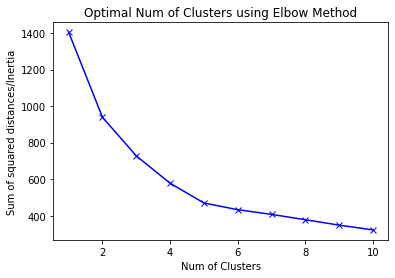

In [225]:
Sum_of_squared_distances = [] #For Storing Errors
for num_clusters in range(1,11) : #We would check for the number of clusters between 1 and 10
 kmeans = KMeans(random_state=0,n_clusters=num_clusters).fit(data) #Fitting the data for the clustering with corresponding number of clusters
 Sum_of_squared_distances.append(kmeans.inertia_) #Storing the inertia in sum of swuared distances
plt.plot(range(1,11),Sum_of_squared_distances,'bx-') 
plt.xlabel('Num of Clusters') #X label for the plot
plt.ylabel('Sum of squared distances/Inertia') #Y label for the plot
plt.title('Optimal Num of Clusters using Elbow Method') #Title of the plot
plt.show()

In [226]:
kmeans_5 = KMeans(random_state=0,n_clusters=5).fit(data)
col = kmeans_5.labels_.astype(float) #For using further to colour different clusters with different colours

From the above elbow curve, we can observe that the appropriate number of clusters would be 5.

#c.

In [227]:
from sklearn.manifold import TSNE #Importing for t-sne embedding
data_emb= TSNE(n_components=2, learning_rate='auto',init='random',method='barnes_hut').fit_transform(data)
#Fitting the data for t-sne embedding

In [228]:
data_emb.shape

(351, 2)

In [229]:
data_emb #Printing the embedded data

array([[  8.319816  ,  39.23644   ],
       [  8.161146  ,  41.358303  ],
       [  9.831823  ,  37.634842  ],
       [  9.896904  ,  39.662453  ],
       [  7.456653  ,  36.531063  ],
       [  5.897223  ,  40.15188   ],
       [  9.85916   ,  41.995785  ],
       [ 10.917948  ,  41.260334  ],
       [  4.7351704 ,  39.399895  ],
       [ 10.740701  ,  41.91133   ],
       [  6.015575  ,  39.16358   ],
       [ 11.653741  ,  42.905266  ],
       [  7.270531  ,  38.722923  ],
       [ 10.137956  ,  36.865036  ],
       [  7.7774096 ,  40.225357  ],
       [  5.633932  ,  39.849922  ],
       [  8.621498  ,  43.18284   ],
       [  6.601671  ,  40.29823   ],
       [ 11.474001  ,  40.8603    ],
       [ 10.061624  ,  42.306744  ],
       [  8.540331  ,  36.348984  ],
       [  9.366884  ,  37.487423  ],
       [ 11.1015625 ,  40.014145  ],
       [  5.4116297 ,  41.35061   ],
       [  9.530067  ,  39.10805   ],
       [  8.224397  ,  37.14445   ],
       [  6.05049   ,  37.011658  ],
 

In [230]:
# setting the  embedded data into a dataframe
data_embedded = pd.DataFrame(data_emb,columns = ['dim1','dim2'])

In [231]:
data_embedded #Checking for the dataframe

,dim1,dim2
0,8.319816,39.236439
1,8.161146,41.358303
2,9.831823,37.634842
3,9.896904,39.662453
4,7.456653,36.531063
...,...,...
346,3.221848,-22.151041
347,-14.755231,-5.277996
348,-14.538501,-11.449124
349,-10.854733,-10.914098


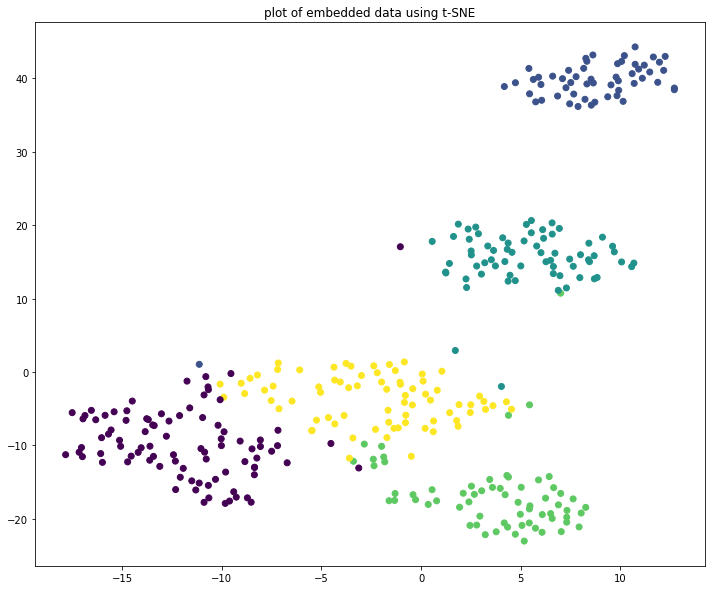

In [232]:
fig, ax = plt.subplots(figsize=(12,10)) # For plotting 
ax.scatter(data_embedded['dim1'], data_embedded['dim2'],c=col) # feeding the values on x and y axis
plt.title('plot of embedded data using t-SNE') # Title for the plot
plt.show() #For showing the plot

Discussed with:
Rupesh Yadav(21i190004)


Abhishek Gupta(21i190005)

References:

https://towardsdatascience.com/data-transformation-and-feature-engineering-e3c7dfbb4899

https://www.codegrepper.com/code-examples/python/log+transform+pandas+dataframe

https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne

